# Carga de las librerías

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=48bd3b274277d4bf47bc5ed6095652390cfe21d12e999b58d4b23894bf5b41ab
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import string, os
import nltk
from nltk.corpus import stopwords

import re
import keras
import random
import io
import unicodedata

from keras import utils
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adamax
import tensorflow.keras.utils as ku
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")
import spacy

In [ ]:
!pip install nltk
!python -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp=spacy.load('en_core_web_lg')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Descargar el paquete de stopwords en español de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Procesamiento y análisis de datos

In [ ]:
# Define cleaning functions
def remove_punctuation(text):
    punctuation = r'[,.;!?()¡«»“”\'\"\-^]'
    return re.sub(punctuation, '', text)

def remove_extra_spaces(text):
    extra_spaces = r'\s+'
    return re.sub(extra_spaces, ' ', text)

def replace_accents(text):
    replacements = str.maketrans("áéíóúüñ", "aeiounn")
    return text.translate(replacements)

In [ ]:
#Se carga el csv que es nuestro dataset
data = pd.read_csv("/content/sample_data/esloganes.csv")
data.head(10)

,eslogan,categoria
0,"""Conectando el futuro, creando posibilidades h...",tecnologia e informatica
1,"""Conectando innovación con eficiencia, juntos ...",tecnologia e informatica
2,¡Conectamos el futuro con tu presente!,tecnologia e informatica
3,"""Conectando el futuro, un byte a la vez.""",tecnologia e informatica
4,"""Conectando el mundo, un byte a la vez.""",tecnologia e informatica
5,"""Conectando el futuro, creando tu visión tecno...",tecnologia e informatica
6,"""Conectando ideas, creando futuro: Innovación ...",tecnologia e informatica
7,"""Conectando ideas, creando soluciones: Innovac...",tecnologia e informatica
8,"""Conectando el presente con el futuro, un byte...",tecnologia e informatica
9,"¡Conectando el futuro, creando hoy!",tecnologia e informatica


In [ ]:
#Se imprimen la cantidad de los diferentes tipos de eslogans que hay
print("Tipos de eslogans:\n",data.categoria.value_counts())

Tipos de eslogans:
 categoria
tecnologia e informatica                 625
salud y bienestar                        625
educacion y formacion                    625
alimentacion y bebidas                   625
moda y belleza                           625
entretenimiento y medios                 625
finanzas y seguros                       625
bienes raices y estructuras              625
retail y comercio electronico            625
automotriz y transporte                  625
energia y medio ambiente                 625
turismo y hospitalidad                   625
manufactura e industria                  625
consultoria y servicios profesionales    625
telecomunicaciones                       625
deportes y recreacion                    625
Name: count, dtype: int64


In [ ]:
#Printing the size of dataset
print("Tamano del Dataset:",data.shape)

Tamano del Dataset: (10000, 2)


In [ ]:
#Adding a column of numbers of Characters,words and sentences in each msg
data["Num_Caracteres"] = data["eslogan"].apply(len)
data["Num_Palabras"]=data.apply(lambda row: nltk.word_tokenize(row["eslogan"]), axis=1).apply(len)
data["Num_De_Lineas"] = data["eslogan"].str.split('\n').apply(len)
data.describe()

,Num_Caracteres,Num_Palabras,Num_De_Lineas
count,10000.000000,10000.000000,10000.0000
mean,61.705600,12.445600,1.0002
std,17.330388,3.283279,0.0200
min,24.000000,5.000000,1.0000
25%,48.000000,10.000000,1.0000
50%,59.500000,12.000000,1.0000
75%,72.250000,15.000000,1.0000
max,221.000000,44.000000,3.0000


from matplotlib import pyplot as plt
_df_0['Num_Caracteres'].plot(kind='hist', bins=20, title='Num_Caracteres')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Num_Palabras'].plot(kind='hist', bins=20, title='Num_Palabras')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Num_De_Lineas'].plot(kind='hist', bins=20, title='Num_De_Lineas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Num_Caracteres', y='Num_Palabras', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Num_Palabras', y='Num_De_Lineas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Num_Caracteres'].plot(kind='line', figsize=(8, 4), title='Num_Caracteres')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Num_Palabras'].plot(kind='line', figsize=(8, 4), title='Num_Palabras')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Num_De_Lineas'].plot(kind='line', figsize=(8, 4), title='Num_De_Lineas')
plt.gca().spines[['top', 'right']].set_visible(False)

<Figure size 1500x1500 with 0 Axes>

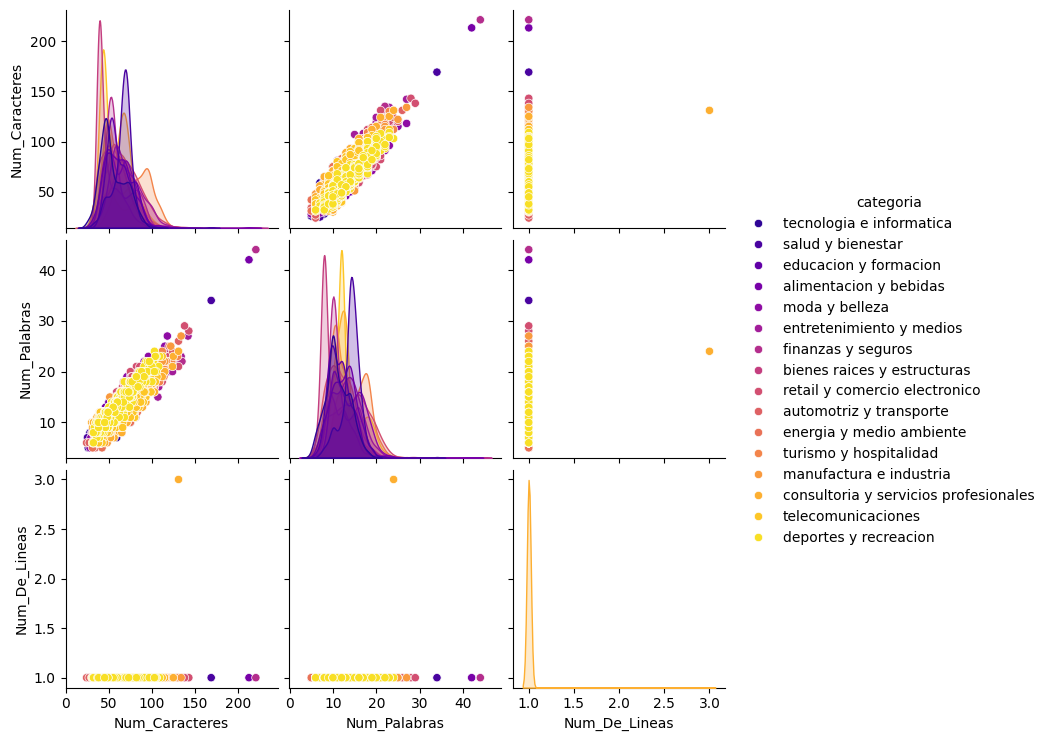

In [ ]:
#Graficando el tamaño de los eslogans para varias categorias
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="categoria", palette="plasma", kind="scatter", markers="o")
plt.show()

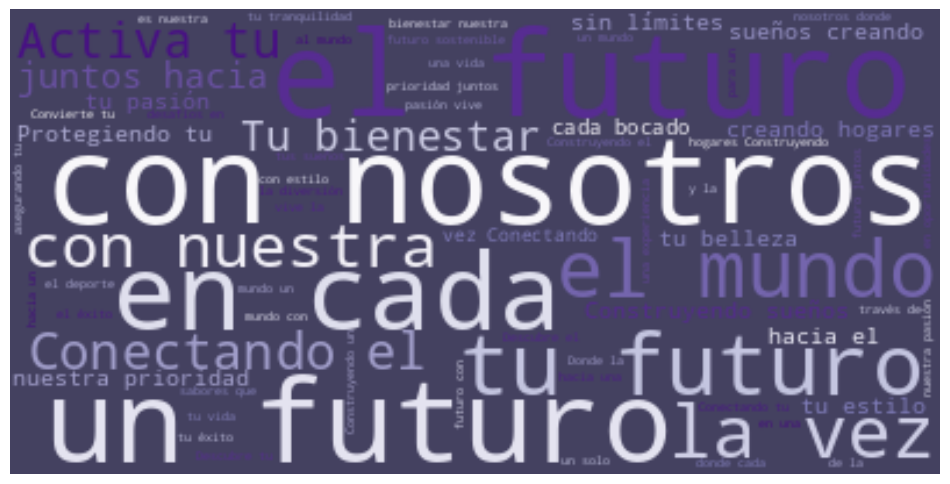

In [ ]:
# Generar la nube de palabras
wordcloud = WordCloud( background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["eslogan"]))
# Configurar y mostrar la nube de palabras
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Para quitar los ejes
plt.show()

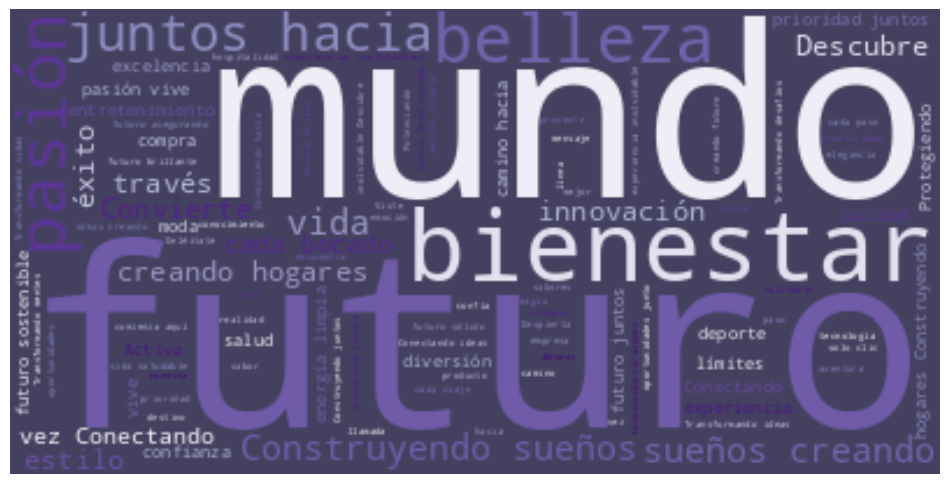

In [ ]:
# Definir stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Generar la nube de palabras
wordcloud = WordCloud(stopwords=stopwords_es, background_color="#444160", colormap="Purples", max_words=800).generate(" ".join(data["eslogan"]))

# Configurar y mostrar la nube de palabras
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Para quitar los ejes
plt.show()

In [ ]:
corpus = data["eslogan"].str.split("\n")
corpus[:15]

0     ["Conectando el futuro, creando posibilidades ...
1     ["Conectando innovación con eficiencia, juntos...
2              [¡Conectamos el futuro con tu presente!]
3           ["Conectando el futuro, un byte a la vez."]
4            ["Conectando el mundo, un byte a la vez."]
5     ["Conectando el futuro, creando tu visión tecn...
6     ["Conectando ideas, creando futuro: Innovación...
7     ["Conectando ideas, creando soluciones: Innova...
8     ["Conectando el presente con el futuro, un byt...
9                 [¡Conectando el futuro, creando hoy!]
10    ["Conectando el futuro, creando la innovación ...
11    [¡Convierte tu visión en innovación con nuestr...
12       ["Conectando el futuro, creando el presente."]
13    ["Conectando el futuro, creando soluciones tec...
14    ["Conectando el futuro, creando innovación hoy."]
Name: eslogan, dtype: object

In [ ]:
# Verificar la estructura de `corpus`
print("Tipo de corpus:", type(corpus))
print("Primeros 5 elementos de corpus:", corpus[:5])

Tipo de corpus: <class 'pandas.core.series.Series'>
Primeros 5 elementos de corpus: 0    ["Conectando el futuro, creando posibilidades ...
1    ["Conectando innovación con eficiencia, juntos...
2             [¡Conectamos el futuro con tu presente!]
3          ["Conectando el futuro, un byte a la vez."]
4           ["Conectando el mundo, un byte a la vez."]
Name: eslogan, dtype: object


In [ ]:
# Asegurarse de que corpus es una lista de cadenas
if isinstance(corpus, pd.Series):
    corpus = corpus.tolist()

corpus[:5]

[['"Conectando el futuro, creando posibilidades hoy."'],
 ['"Conectando innovación con eficiencia, juntos creamos el futuro digital."'],
 ['¡Conectamos el futuro con tu presente!'],
 ['"Conectando el futuro, un byte a la vez."'],
 ['"Conectando el mundo, un byte a la vez."']]

In [ ]:
# Aplanar la lista si es necesario
if corpus and isinstance(corpus[0], list):
    corpus = [item for sublist in corpus for item in sublist]

In [ ]:
# Limpiar el corpus si no está vacío
if corpus:
    corpus = [line.strip() for line in corpus if isinstance(line, str)]  # Remove leading/trailing whitespace and ensure elements are strings
    if corpus:
        corpus[0] = corpus[0].replace('\ufeff', '')  # Remove BOM (Byte Order Mark)
    corpus = [line for line in corpus if line]  # Remove empty lines
    corpus = [remove_punctuation(line) for line in corpus]  # Remove punctuation
    corpus = [remove_extra_spaces(line) for line in corpus]  # Remove extra spaces
    corpus = [replace_accents(line) for line in corpus]  # Replace accents
    corpus = [line.lower() for line in corpus]  # Convert to lowercase

In [ ]:
corpus[:15]

['conectando el futuro creando posibilidades hoy',
 'conectando innovacion con eficiencia juntos creamos el futuro digital',
 'conectamos el futuro con tu presente',
 'conectando el futuro un byte a la vez',
 'conectando el mundo un byte a la vez',
 'conectando el futuro creando tu vision tecnologica',
 'conectando ideas creando futuro: innovacion tecnologica sin limites',
 'conectando ideas creando soluciones: innovacion en cada clic',
 'conectando el presente con el futuro un byte a la vez',
 'conectando el futuro creando hoy',
 'conectando el futuro creando la innovacion hoy',
 'convierte tu vision en innovacion con nuestra tecnologia de vanguardia',
 'conectando el futuro creando el presente',
 'conectando el futuro creando soluciones tecnologicas hoy',
 'conectando el futuro creando innovacion hoy']

In [ ]:
len(corpus)

10001

# Creación del modelo

In [ ]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

# Calculate total number of tokens (words)
total_tokens = 0
for sentence in corpus:
    total_tokens += len(sentence.split())

print("Total Tokens:", total_tokens)
print("Total Words:", total_words, '\n')

# Print only the first 15 tokenized sentences
for i in range(min(15, len(corpus))):  # Ensure we don't print more than available sentences
    sentence = corpus[i]
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    print(sentence, "->", token_list)

Total Tokens: 88478
Total Words: 1722 

conectando el futuro creando posibilidades hoy -> [10, 5, 4, 18, 265, 79]
conectando innovacion con eficiencia juntos creamos el futuro digital -> [10, 36, 2, 434, 9, 176, 5, 4, 142]
conectamos el futuro con tu presente -> [258, 5, 4, 2, 1, 91]
conectando el futuro un byte a la vez -> [10, 5, 4, 7, 177, 11, 6, 32]
conectando el mundo un byte a la vez -> [10, 5, 17, 7, 177, 11, 6, 32]
conectando el futuro creando tu vision tecnologica -> [10, 5, 4, 18, 1, 246, 168]
conectando ideas creando futuro: innovacion tecnologica sin limites -> [10, 59, 18, 4, 36, 168, 47, 54]
conectando ideas creando soluciones: innovacion en cada clic -> [10, 59, 18, 94, 36, 3, 13, 50]
conectando el presente con el futuro un byte a la vez -> [10, 5, 91, 2, 5, 4, 7, 177, 11, 6, 32]
conectando el futuro creando hoy -> [10, 5, 4, 18, 79]
conectando el futuro creando la innovacion hoy -> [10, 5, 4, 18, 6, 36, 79]
convierte tu vision en innovacion con nuestra tecnologia de van

In [ ]:
tokenizer.word_index['digital']

142

In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
input_sequences

array([[  0,   0,   0, ...,   0,  10,   5],
       [  0,   0,   0, ...,  10,   5,   4],
       [  0,   0,   0, ...,   5,   4,  18],
       ...,
       [  0,   0,   0, ...,  33,  56, 231],
       [  0,   0,   0, ...,  56, 231,   2],
       [  0,   0,   0, ..., 231,   2,  16]], dtype=int32)

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100))# input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(int(total_words+1/2), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         172300    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 300)         301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 300)         0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1722)              173922    
                                                                 
 dense_3 (Dense)             (None, 1723)              2968729   
                                                      

In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
2453/2453 [==============================] - 39s 13ms/step - loss: 4.2577 - accuracy: 0.1704
Epoch 2/150
2453/2453 [==============================] - 24s 10ms/step - loss: 3.2498 - accuracy: 0.3450
Epoch 3/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.8016 - accuracy: 0.4249
Epoch 4/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.5400 - accuracy: 0.4677
Epoch 5/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.3648 - accuracy: 0.4969
Epoch 6/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.2301 - accuracy: 0.5199
Epoch 7/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.1219 - accuracy: 0.5367
Epoch 8/150
2453/2453 [==============================] - 24s 10ms/step - loss: 2.0382 - accuracy: 0.5494
Epoch 9/150
2453/2453 [==============================] - 23s 10ms/step - loss: 1.9642 - accuracy: 0.5608
Epoch 10/150
2453/2453 [==============================]

# Evaluación del modelo

[Text(0.5, 0, 'Epocas')]

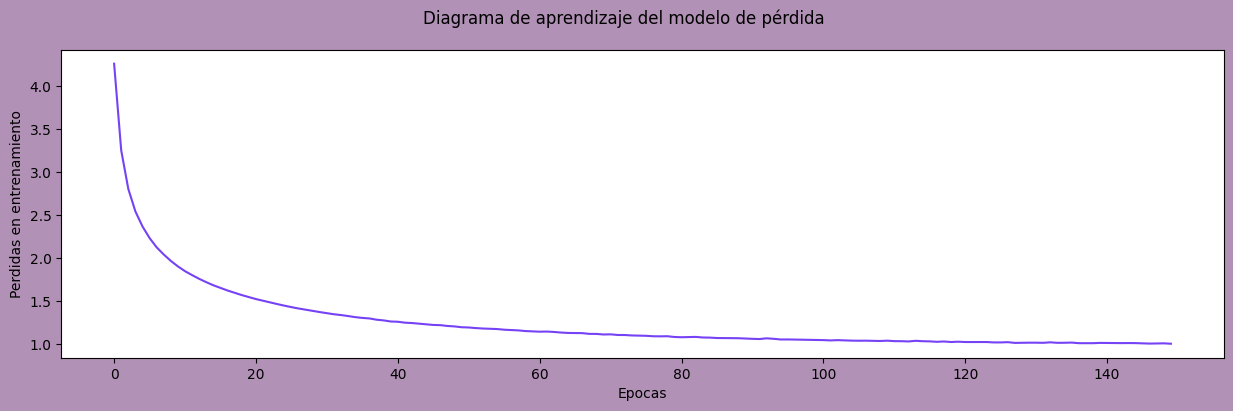

In [ ]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Diagrama de aprendizaje del modelo de pérdida")
pl=sns.lineplot(data=history_df["loss"],color="#7542f5")
pl.set(ylabel ="Perdidas en entrenamiento")
pl.set(xlabel ="Epocas")

# Guardar el modelo

In [ ]:
# Guardar el modelo
model.save('modelo_entrenado.h5')

In [ ]:
from google.colab import files
files.download('modelo_entrenado.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Generación de texto

In [ ]:
seed_text = "digital"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

digital asegurando tu futuro con confianza y estilo en cada paso


In [ ]:
seed_text = "tecnologia"
next_words = 10
output_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
        padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

tecnologia que alimenta tu vida nace la felicidad en cada bocado


In [ ]:
seed_text = "comida"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

comida y calidad que te conecta a la diferencia en cada


In [ ]:
seed_text = "celulares"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

celulares tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "agua"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

agua tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "comida gourmet"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

comida gourmet para tu paladar en cada sorbo y servicios para alcanzar


In [ ]:
seed_text = "comercio electronico"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

comercio electronico la excelencia innovacion que impulsa tu progreso calidad y profesionalismo


In [ ]:
seed_text = "maquillaje"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

maquillaje tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "medicamentos"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

medicamentos tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "muebles"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

muebles tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "pantallas"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

pantallas que inspira tus sentidos un ladrillo a la vez que


In [ ]:
seed_text = "laptops"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

laptops tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "comida"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

comida y calidad que te conecta a la diferencia en cada


In [ ]:
seed_text = "tacos"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

tacos tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "tortas"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

tortas tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "tablets"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

tablets tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "salud"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

salud y bienestar cada dia la salud es el ingrediente confia


In [ ]:
seed_text = "deportes"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

deportes y diversion en un solo click con nuestra tienda online


In [ ]:
seed_text = "informatica"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

informatica a solo un clic en nuestro retail online siempre tendras


In [ ]:
seed_text = "estructuras"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

estructuras el futuro con energia limpia y sostenible juntos por un


In [ ]:
seed_text = "turismo"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

turismo y estilo en cada detalle con nuestra moda unica con


In [ ]:
seed_text = "fotografia"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

fotografia tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "futuro"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

futuro mas alla del camino hacia la salud confia en nosotros


In [ ]:
seed_text = "byte"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

byte y conectando a el mundo con nosotros en cada historia


In [ ]:
seed_text = "carboncito"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

carboncito tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "easymat"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

easymat tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
seed_text = "autocart"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

autocart tu bienestar nuestra prioridad juntos hacia una vida mas saludable


In [ ]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import pandas as pd
from keras.preprocessing.text import Tokenizer

#Cargar el modelo guardado
model_path = '/content/sample_data/modelo_entrenado_final2.h5'
modelo_cargado = load_model(model_path)

In [ ]:
seed_text = "construccion"
next_words = 10
ouptut_text = ""
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([seed_text])

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

construccion educada encuentra espectacular educada evidente evidente evidente evidente nuestro evidente


# Guardado de Tokens

In [ ]:
# Create a dictionary to store the tokens
tokens = {}

# Loop through the corpus and extract the tokens
for line in corpus:
    # Split the line into words
    words = line.split()

    # For each word, add it to the dictionary if it's not already there
    for word in words:
        if word not in tokens:
            tokens[word] = 0

        # Increment the count of the word
        tokens[word] += 1

# Print the tokens and their counts
for word, count in tokens.items():
    print(f"{word}: {count}")

# Save the tokens to a file
with open("tokens.txt", "w") as f:
    for word, count in tokens.items():
        f.write(f"{word} {count}\n")

conectando: 1612
el: 2788
futuro: 2764
creando: 1016
posibilidades: 33
hoy: 208
innovacion: 497
con: 3714
eficiencia: 12
juntos: 1686
creamos: 68
digital: 89
conectamos: 36
tu: 5206
presente: 127
un: 2204
byte: 66
a: 1554
la: 2542
vez: 568
mundo: 1169
vision: 40
tecnologica: 73
ideas: 319
futuro:: 91
sin: 394
limites: 334
soluciones:: 24
en: 3031
cada: 1364
clic: 302
convierte: 403
nuestra: 1387
tecnologia: 201
de: 1338
vanguardia: 39
soluciones: 161
tecnologicas: 7
vida: 737
diaria: 5
haz: 62
que: 869
sea: 21
parte: 13
byte:: 2
innovando: 102
para: 531
transformar: 5
una: 803
transforma: 68
manana: 74
diaria:: 1
simplificar: 1
traves: 354
poder: 35
alcance: 60
mentes: 322
y: 1761
mas: 392
alla: 13
construyendo: 1289
futuros:: 26
te: 114
inspira: 74
conecta: 140
potencia: 23
transformando: 874
paso: 543
del: 392
las: 32
brillantes: 145
hoy:: 5
linea: 148
codigo: 24
escribimos: 1
velocidad: 23
tecnologico: 42
aliado: 21
siempre: 132
somos: 114
imparables: 6
mundos: 27
accion: 31
potenci

# Convertimos el modelo .h5 a tensorflow de javascript

In [ ]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

sample_data


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
  

In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras /content/sample_data/modelo_entrenado_final2.h5 carpeta_salida

2024-06-12 21:50:29.529707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 21:50:30.532537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of4.bin  group1-shard2of4.bin  group1-shard3of4.bin  group1-shard4of4.bin	model.json
